In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
steps = pd.read_csv('./stepCountSplit/stepCounts', low_memory=False)
steps.shape

(1080182, 57)

In [3]:
steps.columns

Index(['healthCode', 'date', 'blob', 'numDataPoints', 'appVersionTable',
       'appVersionFile', 'phoneInfo', 'source', 'sourceID', '00:00:00',
       '00:30:00', '01:00:00', '01:30:00', '02:00:00', '02:30:00', '03:00:00',
       '03:30:00', '04:00:00', '04:30:00', '05:00:00', '05:30:00', '06:00:00',
       '06:30:00', '07:00:00', '07:30:00', '08:00:00', '08:30:00', '09:00:00',
       '09:30:00', '10:00:00', '10:30:00', '11:00:00', '11:30:00', '12:00:00',
       '12:30:00', '13:00:00', '13:30:00', '14:00:00', '14:30:00', '15:00:00',
       '15:30:00', '16:00:00', '16:30:00', '17:00:00', '17:30:00', '18:00:00',
       '18:30:00', '19:00:00', '19:30:00', '20:00:00', '20:30:00', '21:00:00',
       '21:30:00', '22:00:00', '22:30:00', '23:00:00', '23:30:00'],
      dtype='object')

In [4]:
steps = steps[(steps['date']<'2020-01-01')&(steps['date']>'2015-01-01')] #filter date errors

In [5]:
toExclude = ['9e8aba99-bfed-493a-a154-e41249b2504b', 'd12117d5-dc96-4f96-8c70-61fcd0b5b6d9', 'ed1f2883-0612-4503-9a92-e5e2a38c6d7e',
'bd6321c0-9c4e-4a66-b9ea-18c1f1553fb7', '27591ae7-743d-4bb1-bd78-a34da3d254ac'] #tester IDs

In [6]:
#Look for abnormal entries, such as the withings scale adding 10000+ steps in one single line
steps[(steps['healthCode']=='209778f9-683d-46e2-90f0-4b9f89458ad7') & (steps['date']=='2017-07-06')] # blob 16739258 line 73 

,healthCode,date,blob,numDataPoints,appVersionTable,appVersionFile,phoneInfo,source,sourceID,00:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
569622,209778f9-683d-46e2-90f0-4b9f89458ad7,2017-07-06,16681320,870,"version 2.0.1, build 3",NaN,"iPhone9,4",Agnieszka's Apple Watch,com.apple.health.660EE30E-C2D3-4356-AF3B-25008...,876.000000,...,4387.081967,160.0,916.0,900.0,272.0,0.0,500.0,544.0,32.000000,0.0
569623,209778f9-683d-46e2-90f0-4b9f89458ad7,2017-07-06,16681320,76,"version 2.0.1, build 3",NaN,"iPhone9,4",Agnieszka’s iPhone7,com.apple.health.C70B056D-AEEA-4BC2-9A7F-2A9C2...,312.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
569625,209778f9-683d-46e2-90f0-4b9f89458ad7,2017-07-06,16681320,1512,"version 2.0.1, build 3",NaN,"iPhone9,4",Health Mate,com.withings.wiScaleNG,1168.000000,...,4392.000000,156.0,920.0,900.0,272.0,0.0,0.0,0.0,0.000000,0.0
569756,209778f9-683d-46e2-90f0-4b9f89458ad7,2017-07-06,16682984,12,"version 2.0.1, build 3",NaN,"iPhone9,4",Agnieszka’s iPhone7,com.apple.health.C70B056D-AEEA-4BC2-9A7F-2A9C2...,104.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
569757,209778f9-683d-46e2-90f0-4b9f89458ad7,2017-07-06,16682984,62,"version 2.0.1, build 3",NaN,"iPhone9,4",Agnieszka's Apple Watch,com.apple.health.660EE30E-C2D3-4356-AF3B-25008...,292.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
571566,209778f9-683d-46e2-90f0-4b9f89458ad7,2017-07-06,16739258,1,"version 2.0.1, build 3",NaN,"iPhone9,4",Health Mate,com.withings.wiScaleNG,10634.587554,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.412446,0.0


In [7]:
#Sanity check for step count
print("The latest date for step counts: %s" %max(steps['date']))
print("The earliest date for step counts: %s" %min(steps['date']))
steps.shape

The latest date for step counts: 2019-05-12
The earliest date for step counts: 2015-01-02


(1065176, 57)

In [8]:
steps['sourceID'] = steps['sourceID'].fillna('not available')
steps['source'] = steps['source'].fillna('not available')

In [9]:
grouped = steps.groupby(by=['healthCode', 'date', 'appVersionTable', 'sourceID', 'source'], as_index=False)

In [10]:
groupedSteps = grouped.sum()

In [11]:
groupedStepsApple = groupedSteps[groupedSteps.apply(lambda row: 'com.apple.health' in row['sourceID'],axis=1)]

In [11]:
groupedSteps.sort_values(by='numDataPoints', ascending=False)

,healthCode,date,appVersionTable,sourceID,source,blob,numDataPoints,00:00:00,00:30:00,01:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
804920,e8f9867b-f075-4c2b-a884-bdd4e7e131d3,2018-01-05,"version 2.0.3, build 101",com.withings.wiScaleNG,Health Mate,22234125,348903,39146.000000,4761.0,217419.0,...,65596.0,126093.0,134090.0,10070.0,440960.000000,11660.000000,51873.000000,6348.000000,20611.0,30624.000000
544821,a6ada566-3952-4e4f-8a30-a4fe1e1abce4,2018-05-22,"version 2.0.3, build 101",com.withings.wiScaleNG,Health Mate,27362955,47158,0.000000,12782.0,16102.0,...,3116.0,11726.0,48954.0,12710.0,61418.000000,28946.000000,30504.000000,164.000000,17794.0,0.000000
471739,8fa8e4e1-4f65-4212-b29f-7639da4847af,2015-08-13,"version 1.0.10, build 1",com.apple.health.2BB32CD3-DB36-4679-8D15-D1737...,iPhone 6,19974567,43451,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,34.0,0.000000
324595,650c9dd3-a1bf-4f7b-a026-6417d4de9ada,2015-11-24,"version 1.5.1, build 10",com.apple.health.6A72B2DC-E75F-4F72-8D06-747BB...,Joe's iPhone,6903555,38229,0.000000,0.0,0.0,...,564.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
77217,1993518c-2129-48a9-89ea-e84566590632,2015-12-23,"version 1.5.1, build 10",com.apple.health.2DDB5985-76A1-4B9B-B97B-81905...,anne's iPhone,14459951,30677,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
651990,c3e22ba8-4567-4a4a-bc3b-9790e6db8cb6,2015-08-13,"version 1.0.10, build 1",com.apple.health.15B6F724-FE93-4CE9-8C15-63DF2...,iPhone 6,20045766,29289,0.000000,0.0,0.0,...,647.0,0.0,0.0,24.0,347.000000,1328.000000,82.000000,311.000000,28.0,0.000000
471748,8fa8e4e1-4f65-4212-b29f-7639da4847af,2015-08-24,"version 1.0.10, build 1",com.apple.health.2BB32CD3-DB36-4679-8D15-D1737...,iPhone 6,15420501,26556,0.000000,62.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
324594,650c9dd3-a1bf-4f7b-a026-6417d4de9ada,2015-11-23,"version 1.5.1, build 10",com.apple.health.6A72B2DC-E75F-4F72-8D06-747BB...,Joe's iPhone,6864239,25330,0.000000,0.0,0.0,...,100806.0,24804.0,5724.0,8427.0,8410.000000,1416.000000,0.000000,0.000000,0.0,0.000000
587900,b202e5a1-a11f-4b56-b6e9-c6de9eb04f7b,2015-07-10,"version 1.0.9, build 9",com.apple.health.F51F0FEE-D7E0-4529-AD9E-9A671...,iPhone 6,9148910,23259,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
324620,650c9dd3-a1bf-4f7b-a026-6417d4de9ada,2015-12-19,"version 1.5.1, build 10",com.apple.health.6A72B2DC-E75F-4F72-8D06-747BB...,Joe's iPhone,7209480,22949,245.000000,558.0,0.0,...,1450.0,4500.0,1400.0,1550.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [15]:
steps.sort_values(by='date', ascending=False)

,healthCode,date,blob,numDataPoints,appVersionTable,appVersionFile,phoneInfo,source,sourceID,00:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
1080181,7a664180-bffa-40f7-85e9-7740314312b5,2019-05-12,39037165,2,"version 2.1.3, build 329","version 2.1.3, build 329","iPhone10,6",Sean’s Apple Watch,com.apple.health.D8F5A66B-4683-4521-8A67-3D2DB...,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1078857,125a7e8b-988e-4a95-8d5c-d444e6ac4898,2019-05-11,39031186,9,"version 2.1.3, build 329","version 2.1.3, build 329",iPhone 6,iPhone,com.apple.health.4F6173CE-49FB-4BFC-BA08-0646F...,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1080065,04a37635-eea6-46e2-a605-e7242ea27bfc,2019-05-11,39035000,25,"version 2.1.3, build 329","version 2.1.3, build 329","iPhone11,2",Doug’s Apple Watch,com.apple.health.267EA571-2A4A-4E44-86C4-23782...,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1080064,04a37635-eea6-46e2-a605-e7242ea27bfc,2019-05-11,39035000,16,"version 2.1.3, build 329","version 2.1.3, build 329","iPhone11,2",Doug's iPhone,com.apple.health.4CE99517-C7D0-44E5-930C-075D4...,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1080063,d6ba8c36-a545-432b-8d44-1a149bf0248b,2019-05-11,39034999,14,"version 2.1.3, build 329","version 2.1.3, build 329","iPhone10,6",Steve’s Apple Watch,com.apple.health.86C1C0A3-3735-4AA1-BECE-06C3D...,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1080062,d6ba8c36-a545-432b-8d44-1a149bf0248b,2019-05-11,39034999,3,"version 2.1.3, build 329","version 2.1.3, build 329","iPhone10,6",iPhone,com.apple.health.2752588D-07A1-4FBB-BAE5-73FD8...,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1080059,909ada6e-37c9-42ff-96b5-25f21227243e,2019-05-11,39034917,4,"version 2.1.3, build 329","version 2.1.3, build 329","iPhone9,2",Ronny 's iPhone 7+,com.apple.health.E08E34F8-FBB8-46F7-8FFA-EB37B...,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1080058,909ada6e-37c9-42ff-96b5-25f21227243e,2019-05-11,39034917,22,"version 2.1.3, build 329","version 2.1.3, build 329","iPhone9,2",Ronny’s Apple Watch,com.apple.health.D357873A-3A69-45D0-8A56-E05E2...,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1078858,125a7e8b-988e-4a95-8d5c-d444e6ac4898,2019-05-11,39031186,26,"version 2.1.3, build 329","version 2.1.3, build 329",iPhone 6,Frank’s Apple Watch,com.apple.health.0E1C2DAC-AEC7-4D80-AA80-7207C...,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1080051,fc8bd16d-b66d-42a1-969e-34edb6647c4f,2019-05-11,39033692,3,"version 2.1.3, build 329","version 2.1.3, build 329","iPhone9,2",Rosario's iPhone,com.apple.health.2DC114C5-3D96-43BB-B715-012F8...,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


Number of events per participant


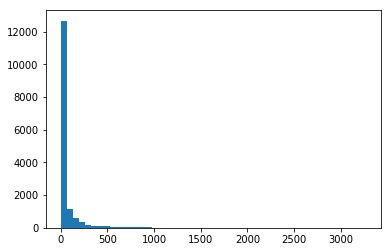

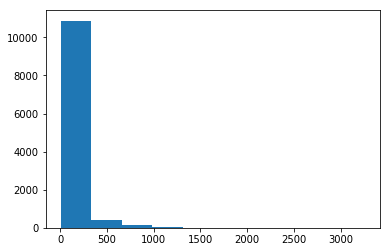

In [18]:
print("Number of events per participant")
counts = Counter([x for x in groupedSteps['healthCode']])
plt.hist(counts.values(), bins=50)
plt.show()
plt.hist([x for x in counts.values() if x > 3])
plt.show()

Number of data points


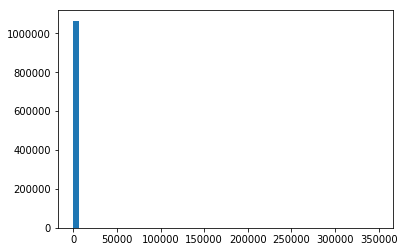

In [15]:
print("Number of data points")
counts = Counter([x for x in groupedSteps['healthCode']])
plt.hist(steps['numDataPoints'], bins=50)
plt.show()


In [12]:
def filterAndMakeVars(data, minDataPoints=150, maxDataPoints = 10000, minNumSteps = 200, maxNumSteps=50000, maxNumStepsPerHalfHour=10000, minNumDays=3):
    data = data[(data['numDataPoints'] > minDataPoints) & (data['numDataPoints'] < maxDataPoints)]
    hours = list(data.columns[6:54])
    for h in hours:
        data = data[data[h] < maxNumStepsPerHalfHour]
    data['totalSteps'] = data.apply(lambda row: np.sum(row[8:]), axis=1)
    data = data[(data['totalSteps'] > minNumSteps) & (data['totalSteps'] < maxNumSteps)]
    data['dayofweek'] = data.apply(lambda row: pd.to_datetime(row['date']).dayofweek, axis=1)
    data['weekday'] = data.apply(lambda row: 1 if row['dayofweek'] < 5 else 0, axis=1)
    data['winter'] = data.apply(lambda row: 0 if (pd.to_datetime(row['date']).month < 9 and pd.to_datetime(row['date']).month > 2) else 1, axis=1)
    counts = Counter([x for x in data['healthCode']])
    moreThanN = [k for k,v in counts.items() if v >= minNumDays]
    data = data[data['healthCode'].isin(moreThanN)]
    print("Proportion of summer/total days: %s" %str(round(
    data[data['winter']==0].shape[0]/data.shape[0],4)))
    print("Proportion of weekday/total days: %s" %str(round(
    data[data['weekday']==1].shape[0]/data.shape[0],4)))
    print("Filtered frame with %s days for %s people" %(str(data.shape[0]),str(len(set(data['healthCode'])))))
    return data
def plotStepsBySeason(data):
    summerWknd = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalSteps'])[(data['winter']==0) & (data['weekday']==0)]
    winterWknd = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalSteps'])[(data['winter']==1) & (data['weekday']==0)]
    summerWkday = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalSteps'])[(data['winter']==0) & (data['weekday']==1)]
    winterWkday = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalSteps'])[(data['winter']==1) & (data['weekday']==1)]
    
    toPlot = []
    for x in [summerWkday, winterWkday, summerWknd, winterWknd]:
        toPlot.append((x.mean().drop(labels=['weekday', 'winter']), x.shape[0]))
    fig, axs = plt.subplots(1,2, figsize=(12, 6), sharey=True)
    axs[0].plot(range(48),toPlot[0][0], label='Summer weekday n=' + str(toPlot[0][1]), color='red')
    axs[0].plot(range(48),toPlot[1][0], label='Winter weekday n=' + str(toPlot[1][1]), color='blue')
    axs[0].legend()
    axs[0].set_xticks(range(48))
    axs[0].set_xlabel('Time of day')
    axs[0].set_ylabel('Step count')
#     axs[0].set_xticklabels(['' for x in range(48)])
    axs[0].set_xticklabels([x if i % 2 == 0 else '' for i,x in enumerate(toPlot[0][0].index)], rotation='vertical')
    axs[1].plot(range(48),toPlot[2][0], label='Summer weekend n=' + str(toPlot[2][1]), color='darkred')
    axs[1].plot(range(48),toPlot[3][0], label='Winter weekend n=' + str(toPlot[3][1]), color='navy')
    axs[1].set_xlabel('Time of day')
    axs[1].set_xticks(range(48))
    axs[1].set_xticklabels([x if i % 2 == 0 else '' for i,x in enumerate(toPlot[0][0].index)], rotation='vertical')
    axs[1].legend()
    fig.suptitle('StepCount by season')
    
def plotStepsBySeasonWError(data):
    summerWknd = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalSteps'])[(data['winter']==0) & (data['weekday']==0)]
    winterWknd = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalSteps'])[(data['winter']==1) & (data['weekday']==0)]
    summerWkday = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalSteps'])[(data['winter']==0) & (data['weekday']==1)]
    winterWkday = data.drop(columns=['date','blob','dayofweek', 'healthCode','numDataPoints','totalSteps'])[(data['winter']==1) & (data['weekday']==1)]
    
    toPlot = []
    for x in [summerWkday, winterWkday, summerWknd, winterWknd]:
        toPlot.append((x.mean().drop(labels=['weekday', 'winter']), x.shape[0], x.count().drop(labels=['weekday', 'winter'])[0], x.std().drop(labels=['weekday', 'winter'])))
    fig, axs = plt.subplots(1,2, figsize=(12, 6), sharey=True)
    axs[0].errorbar(range(48),toPlot[0][0], 1.96*toPlot[0][3]/np.sqrt(toPlot[0][2]), label='Summer weekday n=' + str(toPlot[0][1]), color='red')
    axs[0].errorbar(range(48),toPlot[1][0], 1.96*toPlot[1][3]/np.sqrt(toPlot[1][2]), label='Winter weekday n=' + str(toPlot[1][1]), color='blue')
    axs[0].legend()
    axs[0].set_xticks(range(48))
    axs[0].set_xlabel('Time of day')
    axs[0].set_ylabel('Step count')
#     axs[0].set_xticklabels(['' for x in range(48)])
    axs[0].set_xticklabels([x if i % 2 == 0 else '' for i,x in enumerate(toPlot[0][0].index)], rotation='vertical')
    axs[1].errorbar(range(48),toPlot[2][0], 1.96*toPlot[2][3]/np.sqrt(toPlot[2][2]), label='Summer weekend n=' + str(toPlot[2][1]), color='darkred')
    axs[1].errorbar(range(48),toPlot[3][0], 1.96*toPlot[3][3]/np.sqrt(toPlot[3][2]), label='Winter weekend n=' + str(toPlot[3][1]), color='navy')
    axs[1].set_xlabel('Time of day')
    axs[1].set_xticks(range(48))
    axs[1].set_xticklabels([x if i % 2 == 0 else '' for i,x in enumerate(toPlot[0][0].index)], rotation='vertical')
    axs[1].legend()
    fig.suptitle('StepCount by season')
    

In [13]:
def plotTotalStepsBySeason(data, outliers=True):
    data = data[['winter','weekday','totalSteps']]
    summerWknd = data[(data['winter']==0) & (data['weekday']==0)]['totalSteps']
    winterWknd = data[(data['winter']==1) & (data['weekday']==0)]['totalSteps']
    summerWkday = data[(data['winter']==0) & (data['weekday']==1)]['totalSteps']
    winterWkday = data[(data['winter']==1) & (data['weekday']==1)]['totalSteps']
    fig, axs = plt.subplots(1,1, figsize=(8, 8))
    axs.set_title('Total StepCount by season')
    axs.boxplot([summerWkday,winterWkday,summerWknd,winterWknd], showfliers=outliers)
    axs.set_xticks(range(1,5))
    axs.set_xticklabels(['Summer Weekday', 'Winter Weekday', 'Summer Weekend', 'Winter Weekend'], rotation='vertical')
    plt.show()
#     axs.legend()


In [14]:
filteredSteps = filterAndMakeVars(groupedStepsApple, minNumSteps = 200, maxNumSteps=50000)

Proportion of summer/total days: 0.5828
Proportion of weekday/total days: 0.7198
Filtered frame with 69642 days for 3320 people


In [12]:
set(groupedSteps[groupedSteps.apply(lambda row: 'phone' in row['source'].lower(), axis=1)]['source'])

{"Jeff's new iPhone 6",
 'Elli’s iPhone',
 '’s iPhone',
 'KyPhone',
 'rambler’s Golden iPhone 6s Plus',
 "Baba's iPhone",
 'CWJ iPhone',
 'Thomas ’s iPhone',
 'Rainbow 的 iPhone 6',
 'iPhone Barry',
 "Rebecca's iPhone ",
 "Eileen's iPhone",
 'Lew’s iPhone',
 "Sonny's iPhone",
 'Jaclynn ’s iPhone',
 'Rod new IPhone',
 'LAWRENCE ’s iPhone',
 'David iPhone 6 Plus ',
 "Phineas' iPhone",
 'Gary’s iPhone',
 "Bryan 's iPhone",
 'Ganesh’s iPhone+',
 'Shannon Iphone',
 "Lane's iPhone",
 "Kendall's iPhone",
 "Austin's iPhone ",
 "David 's iPhone",
 'XS Max iPhone',
 'Leah’s iPhone',
 'David iPhone 6s',
 'Ian’s iPhone',
 'Gabriel ’s iPhone',
 'Brooks’s iPhone',
 "John's Iphone 6",
 "tyler's iPhone",
 'LBPhone SE',
 'Hailey’s iPhone',
 "Chris's iPhone 7 plus",
 "Hebitz's iPhone",
 'Patrick ’s iPhone',
 "Binder's iPhone 6S",
 'Angela ’s iPhone',
 'Randy Sampson’s iPhone',
 "Theodore's iPhone",
 'Wyatt’s iPhone',
 "PLB's iPhone",
 "Cally's iPhone",
 'My’s iPhone',
 "Nicole's iPhone",
 'Andreas ’s New

In [13]:
set(groupedSteps[groupedSteps.apply(lambda row: 'phone' not in row['source'].lower(), axis=1)]['source'])

{'Pablo’s Apple\xa0Watch',
 'Stefen’s Apple\xa0Watch',
 "thomas's Apple\xa0Watch",
 'JPT X',
 'Ispirited gold',
 'Victoria’s Apple\xa0Watch',
 '\uf8ffVako',
 "Leon's Apple\xa0Watch",
 'Adriano - 7 Plus',
 'Theodore’s Apple\xa0Watch',
 "Kristen's Apple\xa0Watch",
 'JG Apple\xa0Watch',
 'Ramakrishna’s Apple\xa0Watch',
 "ERIN's Apple\xa0Watch",
 'Guy’s Apple\xa0Watch',
 'Ross "My Lord"',
 'Tinkers SE',
 "Charu's Apple\xa0Watch",
 'W’s Ale\xa0Watch',
 'Torrence’s Apple\xa0Watch',
 'Micah’s Apple\xa0Watch',
 'Apple\xa0Watch de luis',
 "Mike 's Apple\xa0Watch Series 3",
 "matt's Apple\xa0Watch",
 'Trisha’s Apple\xa0Watch',
 "Courtney's Apple\xa0Watch",
 "N's Apple\xa0Watch",
 'Thor',
 'Miranda',
 "Ernst's Apple\xa0Watch",
 'Adonis’s Apple\xa0Watch',
 'Clayton iP7',
 'Musicaveritas',
 'Ze i Fone',
 'Hazel',
 'ARVIND’s Apple\xa0Watch',
 'BG 6+',
 'Thor VII',
 'REB',
 'Ken-Sue’s Apple\xa0Watch',
 'Jane’s Apple\xa0Watch',
 "y's 6s plus",
 'Jacquelyn’s Apple\xa0Watch',
 'Carol’s Apple\xa0Watch',


In [15]:
set(groupedSteps[groupedSteps.apply(lambda row: ('watch' in row['source'].lower()) &('com.apple.health' in row['sourceID']), axis=1)]['source'])

{'Saundra’s Apple\xa0Watch',
 'Pablo’s Apple\xa0Watch',
 'Neil’s Apple\xa0Watch',
 'Stefen’s Apple\xa0Watch',
 'GANDHI’s Apple\xa0Watch',
 "thomas's Apple\xa0Watch",
 'Drsoos watch LTE😜',
 'Sunil’s Apple\xa0Watch',
 'Eitan’s Apple\xa0Watch',
 'Victoria’s Apple\xa0Watch',
 "Leon's Apple\xa0Watch",
 'Mark Steven’s Apple\xa0Watch',
 "Oleg's Apple\xa0Watch",
 'Claudia’s Apple\xa0Watch',
 'Theodore’s Apple\xa0Watch',
 "Kristen's Apple\xa0Watch",
 'JG Apple\xa0Watch',
 "Jake's Apple\xa0Watch",
 'Apple\xa0Watch de Tuly',
 'Nathan’s Apple\xa0Watch',
 "Shahalam's Apple\xa0Watch",
 'Dawn’s Apple\xa0Watch',
 "SUNIL's Apple\xa0Watch",
 "Adam's Apple\xa0Watch",
 'Guy’s Apple\xa0Watch',
 'Ramakrishna’s Apple\xa0Watch',
 'Paul L’s Apple\xa0Watch',
 "ERIN's Apple\xa0Watch",
 'Tim’s Apple\xa0Watch Series 3',
 'Lupco’s Apple\xa0Watch',
 'Kipjaz’s Apple\xa0Watch',
 "Katherine's Apple\xa0Watch",
 'Alec’s Apple\xa0Watch',
 "Rangarirayi's Apple\xa0Watch",
 'Oscar’s Apple\xa0Watch',
 'DIANA’s Apple\xa0Watch'

In [16]:
set(groupedSteps[groupedSteps.apply(lambda row: ('watch' not in row['source'].lower())& ('phone' not in row['source'].lower()) & ('com.apple.health' in row['sourceID']), axis=1)]['source'])

{'Venus 🌟✨',
 'Spencer 6',
 'JPT X',
 'LZ IP 6',
 'Ispirited gold',
 "Heather' screen",
 '\uf8ffVako',
 "Brian's 7Plus",
 'Adriano - 7 Plus',
 'Steph 6s',
 'Walter Hotspot',
 'Chucks 6 plus',
 'YKج',
 'Longclaw',
 'Eds.  ',
 'D6',
 'Seraphim',
 'Ulyses2',
 'Baker Mayfield #6',
 'ClarkKent',
 "Rick's 6s",
 'Mine',
 'Ross "My Lord"',
 'Tinkers SE',
 'Bilbo',
 'Peapod for 2',
 'Seahog',
 'Brian-O-Matic',
 'Marco',
 'Borg 2',
 'iPino_X',
 "Jordan's",
 "Micha's WorkToy",
 'Miranda',
 'Thor',
 'Gemini22',
 'Jason flea',
 'Angelo',
 'Melpomene',
 'Kyles 6 plus',
 'Clayton iP7',
 'surly-5E',
 'Musicaveritas',
 'Ze i Fone',
 'Hazel',
 'Optimus Time',
 'KKiP7p',
 'BG 6+',
 "Kim's magical mobile thingy",
 'Thor VII',
 'REB',
 "Inder's 6s+ Gold",
 'Paradise',
 "Dave's 6",
 "y's 6s plus",
 "Max's",
 'marion’s 6',
 'tracy',
 'EJiP6+',
 'djoiiW',
 'Adele Blair',
 'Wrist Wrist Wrist Wrist ⌚️',
 'F18P5K1TG5MC',
 'SonicScrewdriver',
 'HKEY_LOCAL_MACHINE',
 'A.  Fone',
 'Big Fat Daddy',
 'Hokkaido',
 'iP

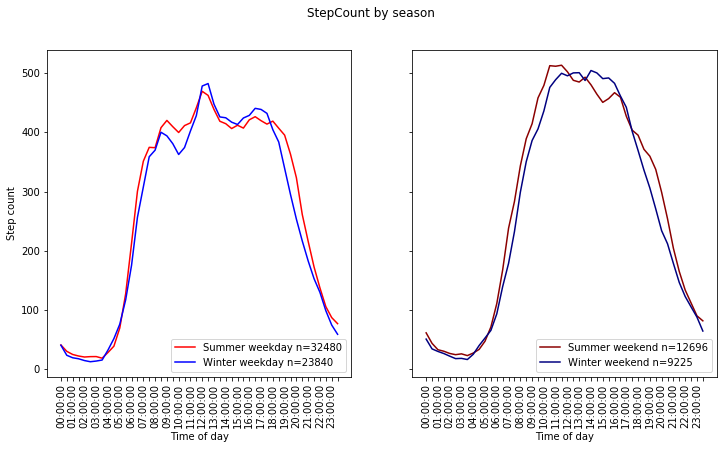

In [153]:
plotStepsBySeason(filteredSteps)

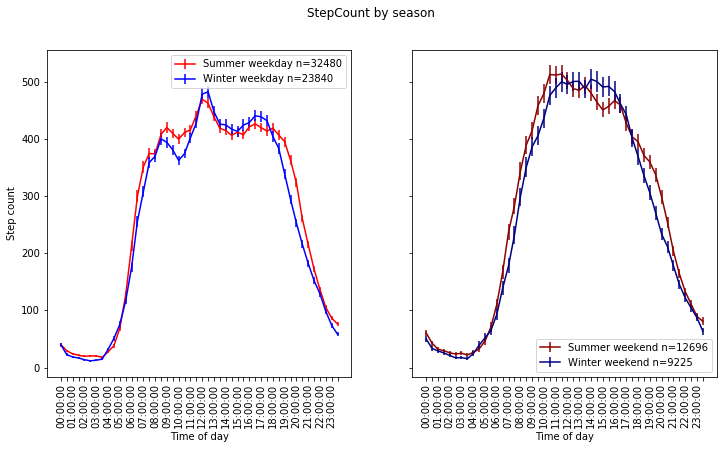

In [154]:
plotStepsBySeasonWError(filteredSteps)

In [20]:
filteredSteps.sort_values(by='date', ascending=False)

,healthCode,date,appVersionTable,sourceID,blob,numDataPoints,00:00:00,00:30:00,01:00:00,01:30:00,...,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,totalSteps,dayofweek,weekday,winter
654018,c4773317-c32e-4275-b1a3-e8a062b342bf,2019-05-11,"version 2.1.3, build 329",com.apple.health.F0F24235-29EE-464D-A3E0-DDA5C...,78073218,315,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,17055.0,5,0,0
831672,f0367d99-5813-4f34-8df0-83fbb95e152a,2019-05-11,"version 2.1.3, build 329",com.apple.health.59C3A830-D4C3-485A-BDD3-A04BB...,39036883,225,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8551.0,5,0,0
347329,6bfa9594-f2c2-477b-8e0b-cd0d33dc59b4,2019-05-11,"version 2.1.3, build 329",com.apple.health.2C3FC31C-247A-4B43-BCB9-57E1C...,39036952,1221,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8632.0,5,0,0
287925,59be1b3e-bccd-48fa-a96f-5b09cb5599a6,2019-05-11,"version 2.1.3, build 329",com.apple.health.D9359039-B0DF-4E7C-9284-409F8...,78069507,157,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6372.0,5,0,0
732167,d6ba8c36-a545-432b-8d44-1a149bf0248b,2019-05-10,"version 2.1.3, build 329",com.apple.health.86C1C0A3-3735-4AA1-BECE-06C3D...,78050717,266,0.0,0.0,0.0,0.0,...,41.000000,0.000000,0.000000,0.000000,0.000000,0.0,10173.0,4,1,0
347327,6bfa9594-f2c2-477b-8e0b-cd0d33dc59b4,2019-05-10,"version 2.1.3, build 329",com.apple.health.2C3FC31C-247A-4B43-BCB9-57E1C...,39036929,167,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,10828.0,4,1,0
340354,69752db8-91ed-4e52-bcba-0c6137729b85,2019-05-10,"version 2.1.3, build 329",com.apple.health.81F7D3FE-69D1-4016-8E78-9F127...,78047785,185,0.0,0.0,0.0,0.0,...,0.000000,140.000000,337.000000,92.017857,13.982143,0.0,9136.0,4,1,0
287923,59be1b3e-bccd-48fa-a96f-5b09cb5599a6,2019-05-10,"version 2.1.3, build 329",com.apple.health.D9359039-B0DF-4E7C-9284-409F8...,78049130,907,0.0,0.0,0.0,0.0,...,181.000000,0.000000,90.448696,116.551304,0.000000,0.0,4517.0,4,1,0
708680,d1703ed1-e8c1-409e-bc45-d8eff07a369b,2019-05-10,"version 2.1.3, build 329",com.apple.health.0867F990-00A8-4E52-9D44-CEF45...,78034870,176,0.0,0.0,0.0,0.0,...,0.000000,0.000000,138.000000,0.000000,0.000000,0.0,5797.0,4,1,0
654563,c4bbe239-b8ff-4b2b-9d30-afc4ef2f9c18,2019-05-10,"version 2.1.3, build 329",com.apple.health.3D8ECD95-EB30-4317-9AB6-AD01D...,39032515,193,16.0,53.0,64.0,0.0,...,16.000000,334.000000,0.000000,0.000000,171.000000,99.0,8220.0,4,1,0


In [145]:
set(filteredSteps['appVersionTable'])

{'version 1.0.10, build 1',
 'version 1.0.8, build 11 - YML',
 'version 1.0.8, build 4-YML',
 'version 1.0.9, build 9',
 'version 1.5.1, build 10',
 'version 1.6.0, build 1',
 'version 1.6.1, build 1',
 'version 1.6.2, build 1',
 'version 1.7.0, build 2',
 'version 1.7.1, build 1',
 'version 1.7.2, build 1',
 'version 1.7.3, build 1',
 'version 2.0.0, build 3',
 'version 2.0.1, build 3',
 'version 2.0.2, build 2',
 'version 2.0.3, build 101',
 'version 2.1.0, build 104',
 'version 2.1.1, build 105',
 'version 2.1.2, build 109',
 'version 2.1.3, build 329'}

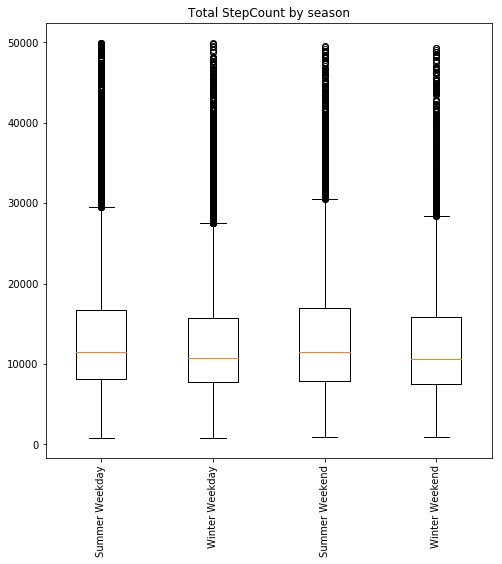

In [17]:
plotTotalStepsBySeason(filteredSteps)

In [15]:
id2ZipNDate = pd.read_csv('./data/id2ZipNDate', sep='\t', header=None)
id2ZipNDate.columns = ['healthCode', 'zip', 'date']
id2Zip = {}
for idx, row in id2ZipNDate.iterrows():
    id2Zip[row['healthCode']]=row['zip']

In [18]:
def getClosestZip(healthCode, date, id2ZipNDate):
    """
    Returns the 3digit zip code available (if any) for the date closest to the query date for a healthCode
    """
    def nearestDate(dates, queryDate):
        return min(dates, key=lambda x: abs(x - queryDate))
    zip3 = -999
    subset = id2ZipNDate[id2ZipNDate['healthCode']==healthCode]
    if subset.shape[0]>0:
        nearest = nearestDate(subset['date'], date)
        zip3 = id2ZipNDate[id2ZipNDate['date']==nearest]['zip']
    return zip3

In [19]:
def getZip(hCode, id2Zip):
    if hCode in id2Zip:
        return id2Zip[hCode]
    else:
        return 'NaN'
def assignZip(data, id2Zip):
    data['zip'] = data.apply(lambda row: getZip(row['healthCode'],id2Zip), axis=1)
    return data

In [20]:
filteredWithZip = assignZip(filteredSteps, id2Zip)

In [21]:
sum([x in id2Zip for x in set(filteredSteps['healthCode'])])

2318

In [25]:
print("%s participant days with zip"%filteredWithZip[filteredWithZip['zip'] != 'NaN'].shape[0])
print("%s participants"%len(set(filteredWithZip[filteredWithZip['zip'] != 'NaN']['healthCode'])))

56483 participant days with zip
2318 participants


In [26]:
weatherData = pd.read_csv('./weather/cleanWeather')

In [41]:
# weatherData

,Year,Month,Type,ZIP3,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,2015,1,PRCP,10,0.000000,0.000000,0.000000,216.000000,36.000000,0.000000,...,0.000000,0.000000,30.000000,41.000000,0.000000,74.000000,127.000000,0.000000,10.000000,5.000000
1,2015,1,PRCP,18,0.000000,0.000000,51.000000,274.500000,7.500000,2.500000,...,0.000000,0.000000,95.500000,57.000000,12.500000,282.000000,5.000000,0.000000,10.000000,9.000000
2,2015,1,PRCP,20,0.000000,0.000000,0.000000,241.500000,44.500000,0.000000,...,0.000000,0.000000,51.000000,147.500000,0.000000,292.000000,154.500000,0.000000,1.500000,22.500000
3,2015,1,PRCP,23,0.000000,0.000000,0.000000,208.000000,0.000000,64.000000,...,0.000000,0.000000,196.000000,0.000000,0.000000,711.000000,0.000000,0.000000,0.000000,0.000000
4,2015,1,PRCP,28,0.000000,0.000000,71.000000,169.000000,23.000000,3.000000,...,5.500000,0.000000,192.000000,6.500000,32.000000,229.000000,14.000000,0.000000,19.000000,0.000000
5,2015,1,PRCP,34,0.000000,0.000000,0.000000,251.000000,38.000000,3.000000,...,0.000000,0.000000,0.000000,43.000000,0.000000,38.000000,74.000000,0.000000,13.000000,5.000000
6,2015,1,PRCP,35,0.000000,15.000000,0.000000,76.000000,48.000000,13.000000,...,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000,64.000000,0.000000,28.000000,64.000000
7,2015,1,PRCP,37,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000
8,2015,1,PRCP,38,0.000000,0.000000,0.000000,277.000000,0.000000,0.000000,...,0.000000,0.000000,76.000000,0.000000,0.000000,198.000000,0.000000,0.000000,64.000000,13.000000
9,2015,1,PRCP,41,0.000000,0.000000,104.000000,119.000000,0.000000,0.000000,...,0.000000,0.000000,69.000000,0.000000,0.000000,602.000000,18.000000,0.000000,97.000000,13.000000


In [27]:
def convertWeatherData2Dict(weatherData):
    weatherDict = {}
    for i, row in weatherData.iterrows():
        weatherDict[(row['Type'],f"{row['ZIP3']:03d}",f"{row['Year']:04d}",f"{row['Month']:02d}")] = [float(x) for x in row[4:]]
    return weatherDict
def getWeatherDataPerDayAndZip(date, zip3, weatherType, weatherDict):
    year, month, day = tuple([int(x) for x in date.split('-')])
    queryKey = (weatherType, zip3, f"{year:04d}", f"{month:02d}")
#     print(queryKey)
    if queryKey in weatherDict:
        return weatherDict[queryKey][int(day-1)]
    else:
        return 'NaN'

In [28]:
weatherDict = convertWeatherData2Dict(weatherData)

In [29]:
filteredWithZip['TAVG']=filteredWithZip.apply(lambda row: getWeatherDataPerDayAndZip(row['date'], row['zip'],'TAVG', weatherDict), axis=1)
filteredWithZip['PRCP']=filteredWithZip.apply(lambda row: getWeatherDataPerDayAndZip(row['date'], row['zip'],'PRCP', weatherDict), axis=1)
filteredWithZip['SNOW']=filteredWithZip.apply(lambda row: getWeatherDataPerDayAndZip(row['date'], row['zip'],'SNOW', weatherDict), axis=1)

In [94]:
avgTempFilter = filteredWithZip[filteredWithZip['TAVG']!='NaN']
avgTempFilter[["TAVG"]] = avgTempFilter[["TAVG"]].apply(pd.to_numeric)
precipFilter = filteredWithZip[filteredWithZip['PRCP']!='NaN']
precipFilter[["PRCP"]] = precipFilter[["PRCP"]].apply(pd.to_numeric)
snowFilter = filteredWithZip[filteredWithZip['SNOW']!='NaN']
snowFilter[["SNOW"]] = snowFilter[["SNOW"]].apply(pd.to_numeric)

(array([ 131.,  569., 2746., 3874., 3930., 3206., 2510., 1851., 1551.,
        1172.]),
 array([  803. ,  2722.2,  4641.4,  6560.6,  8479.8, 10399. , 12318.2,
        14237.4, 16156.6, 18075.8, 19995. ]),
 <a list of 10 Patch objects>)

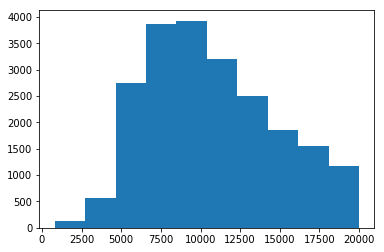

In [33]:
plt.hist([x for x in avgTempFilter['totalSteps'] if x < 20000])

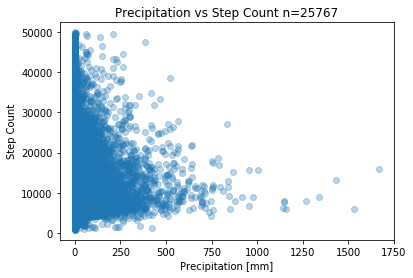

In [31]:
# print(precipFilter[precipFilter['PRCP']>100]['totalSteps'].mean())
# print(precipFilter[precipFilter['PRCP']<=100]['totalSteps'].mean())
plt.scatter(precipFilter['PRCP'], precipFilter['totalSteps'], alpha=0.3)
plt.xlabel('Precipitation [mm]')
plt.ylabel('Step Count')
plt.title('Precipitation vs Step Count n=%s' %precipFilter.shape[0])
plt.show()

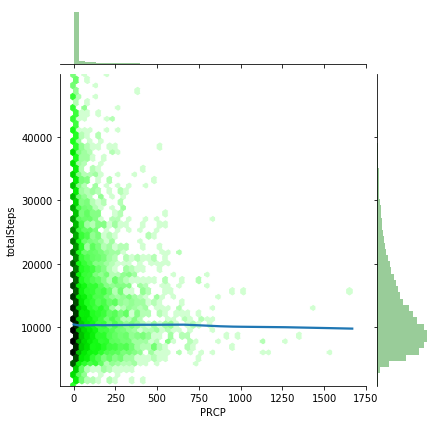

(0, 1669.0)

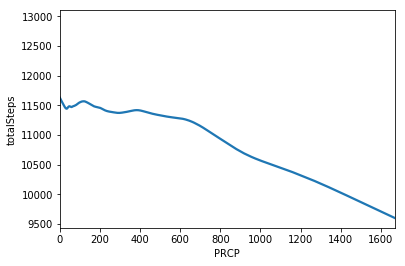

In [141]:


g = (sns.jointplot(precipFilter['PRCP'], precipFilter['totalSteps'], kind="hex", color="#008000",
                  joint_kws={'gridsize':50, 'bins':'log'}).set_axis_labels("Precipitation[mm]", "Step Count"))

(sns.regplot('PRCP', 'totalSteps', data=precipFilter[(precipFilter['PRCP']>0) &(precipFilter['totalSteps']<20000)], scatter=False, lowess=True, ax=g.ax_joint))
# sns.plt.xlim(0, )
plt.show()
(sns.regplot('PRCP', 'totalSteps', data=precipFilter[(precipFilter['PRCP']>0)], scatter=False, lowess=True)).set_xlim(0,max(precipFilter['PRCP']))


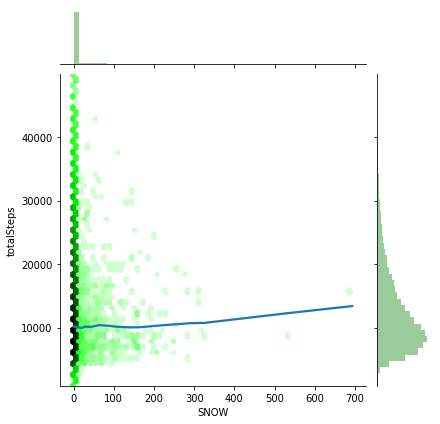

(0, 200)

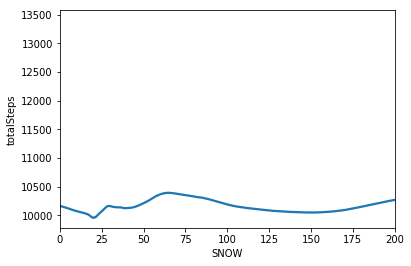

In [145]:


g = (sns.jointplot(snowFilter['SNOW'], snowFilter['totalSteps'], kind="hex", color="#008000",
                  joint_kws={'gridsize':50, 'bins':'log'}).set_axis_labels("Precipitation[mm]", "Step Count"))

(sns.regplot('SNOW', 'totalSteps', data=snowFilter[(snowFilter['SNOW']>0)], scatter=False, lowess=True, ax=g.ax_joint))
# sns.plt.xlim(0, )
plt.show()
(sns.regplot('SNOW', 'totalSteps', data=snowFilter[(snowFilter['SNOW']>0)], scatter=False, lowess=True)).set_xlim(0,200)


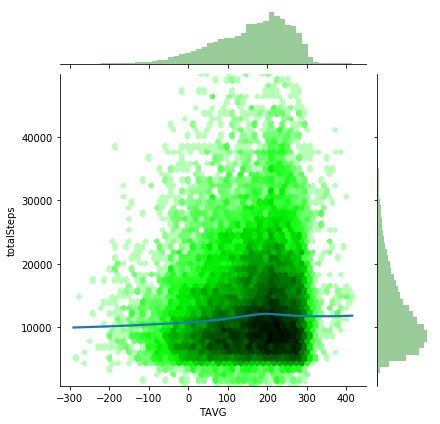

(-290.5, 415.0)

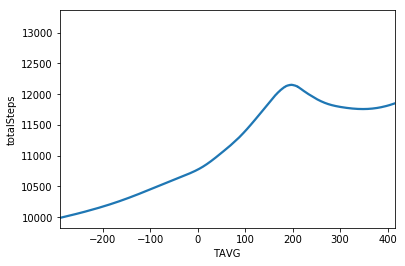

In [146]:
g = (sns.jointplot(avgTempFilter['TAVG'], avgTempFilter['totalSteps'], kind="hex", color="#008000",
                  joint_kws={'gridsize':50, 'bins':'log'}).set_axis_labels("Precipitation[mm]", "Step Count"))

(sns.regplot('TAVG', 'totalSteps', data=avgTempFilter, scatter=False, lowess=True, ax=g.ax_joint))
# sns.plt.xlim(0, )
plt.show()
(sns.regplot('TAVG', 'totalSteps', data=avgTempFilter, scatter=False, lowess=True)).set_xlim(min(avgTempFilter['TAVG']),max(avgTempFilter['TAVG']))


996            84
1075            3
1126            8
1751          480
1753          269
1767            8
1777          155
1809          191
1810            3
1811            3
1821          351
1833          658
1835            3
1837          208
1855           20
1857          836
1859          305
1867           20
1873           61
1875           23
1877          170
3482            3
3847          511
3848          511
3874          183
3876            5
3907          363
3909          312
3955            8
4460            5
           ...   
889961         39
890105       40.5
890131      158.5
890200         13
890201         51
890212        224
890214          5
890217        168
890218         84
890254         33
890255        170
890260         33
890288         15
890298          8
890304         64
892697         28
892698         28
892705         18
893035        178
893164         25
893166          5
893222          3
893322          8
893323          5
894008    

13159.973336499612
12284.61829354382


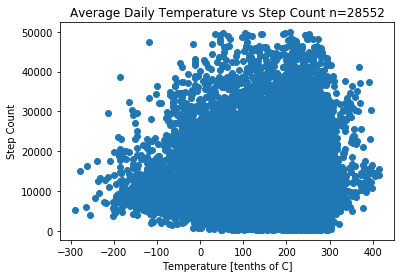

In [128]:
print(avgTempFilter[avgTempFilter['TAVG']>150]['totalSteps'].mean())
print(avgTempFilter[avgTempFilter['TAVG']<=150]['totalSteps'].mean())
fig, ax = plt.fig()
plt.scatter(avgTempFilter['TAVG'], avgTempFilter['totalSteps'])
plt.xlabel('Temperature [tenths of C]')
plt.ylabel('Step Count')
plt.title('Average Daily Temperature vs Step Count n=%s' %avgTempFilter.shape[0])
plt.show()

11330.229902123194
12654.124209494037


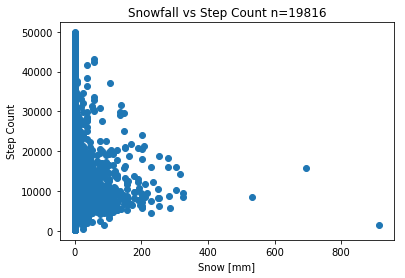

In [130]:
print(snowFilter[snowFilter['SNOW']>100]['totalSteps'].mean())
print(snowFilter[snowFilter['SNOW']<=100]['totalSteps'].mean())
plt.scatter(snowFilter['SNOW'], snowFilter['totalSteps'])
plt.xlabel('Snow [mm]')
plt.ylabel('Step Count')
plt.title('Snowfall vs Step Count n=%s' %snowFilter.shape[0])
plt.show()

In [50]:
print([x for x in filteredSteps[filteredSteps['blob']==19867420]])

['healthCode', 'date', 'appVersionTable', 'sourceID', 'source', 'blob', 'numDataPoints', '00:00:00', '00:30:00', '01:00:00', '01:30:00', '02:00:00', '02:30:00', '03:00:00', '03:30:00', '04:00:00', '04:30:00', '05:00:00', '05:30:00', '06:00:00', '06:30:00', '07:00:00', '07:30:00', '08:00:00', '08:30:00', '09:00:00', '09:30:00', '10:00:00', '10:30:00', '11:00:00', '11:30:00', '12:00:00', '12:30:00', '13:00:00', '13:30:00', '14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00', '17:00:00', '17:30:00', '18:00:00', '18:30:00', '19:00:00', '19:30:00', '20:00:00', '20:30:00', '21:00:00', '21:30:00', '22:00:00', '22:30:00', '23:00:00', '23:30:00', 'totalSteps', 'dayofweek', 'weekday', 'winter', 'zip', 'TAVG', 'PRCP', 'SNOW']


In [54]:
[x for x in filteredSteps[filteredSteps['blob']==19867420].iloc[0]]

['005a0d08-fe21-4a24-9c57-791430c05f04',
 '2017-10-19',
 'version 2.0.2, build 2',
 'com.apple.health.167DE7C8-CB31-4B50-800A-E8522A2DE1F1',
 'ACE’s \uf8ff ⌚️',
 19867420,
 251,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 102.30857142857144,
 75.69142857142856,
 2659.003344481605,
 2681.9146883052804,
 3859.9767040552197,
 2584.298811544992,
 3045.29809040889,
 1341.5567483007876,
 869.6455928363362,
 3428.951181357212,
 708.4891924511742,
 915.8656462585034,
 0.0,
 142.32432432432432,
 1000.1359931359932,
 441.2773874577153,
 2777.2622950819677,
 114.0,
 1881.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 28629.0,
 3,
 1,
 1,
 'NaN',
 'NaN',
 'NaN',
 'NaN']

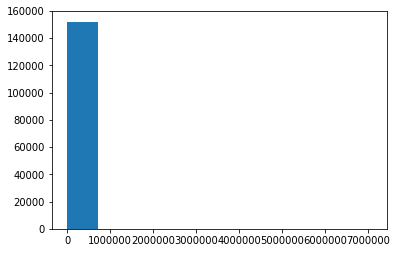

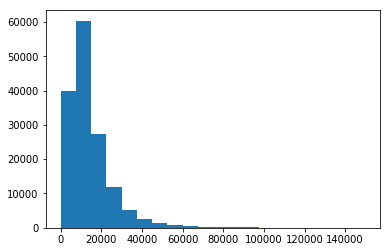

(33, 52)

In [14]:
#Unclean code --> delete later
stepsSubset = steps[steps['numDataPoints'] > 100]
stepsSubset = stepsSubset[stepsSubset['numDataPoints'] < 10000]
stepsSubset['totalSteps'] = stepsSubset.apply(lambda row: np.sum(row[4:]), axis=1)
plt.hist(stepsSubset['totalSteps'])
plt.show()
stepsSubset.sort_values(by='totalSteps', ascending=False)
stepsSubset2 = stepsSubset[(stepsSubset['totalSteps'] < 150000) & (stepsSubset['totalSteps'] > 10)]
stepsSubset2.sort_values(by='totalSteps', ascending=False)
plt.hist(stepsSubset2['totalSteps'],bins=20)
plt.show()
miniSubset = steps[steps['numDataPoints'] > 10000]
miniSubset.shape